In [1]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from time import time
import pandas as pd
from scipy.cluster.hierarchy import *
import os

%matplotlib inline

# 1 um - 2um

In [2]:
with open('/u/MHPC17/pierocor/thesis/Score/data/dt1_1u-2u_SS.dat', 'rb') as f:
    test = np.fromfile(f)
print(test.shape)
test_l = len(test)//3
worst = test[:test_l]
best = test[test_l:2*test_l]
rnd = test[2*test_l:]
x=np.arange(11,11+test_l)  # k_min = 11 in thesis/Silhouette_Score/Silhouette_Score.ipynb

k_range = np.arange(2,x[-1]+1, dtype=int)

(22638,)


In [3]:
from scipy.interpolate import spline

xnew = np.linspace(x[::10].min(),x[::10].max(),500) #300 represents number of points to make between T.min and T.max

rnd_sm = spline(x[::10],rnd[::10],xnew)

/u/MHPC17/pierocor/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """


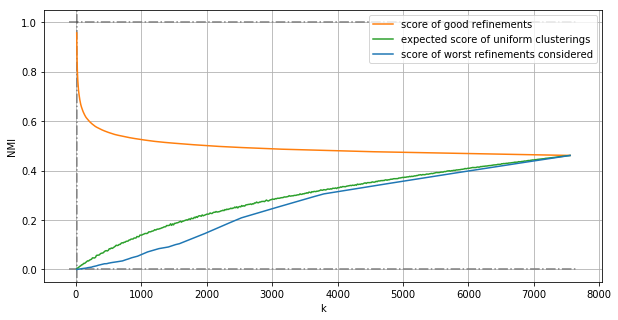

In [4]:
fig = plt.figure(figsize=(10,5))
plt.ylim(ymax=1.05, ymin=-0.05)
# plt.ylim(ymax=0.1, ymin=-0.05)
# plt.xlim(xmax=500, xmin=0)
plt.xlabel('k')
plt.ylabel('NMI')
plt.grid()

plt.hlines(0,xmin=-100,xmax=x[-1]+100, colors='tab:gray', linestyle='-.')
plt.hlines(1,xmin=-100,xmax=x[-1]+100, colors='tab:gray', linestyle='-.')
plt.vlines(10,ymin=-0.1,ymax=1.1, colors='k', linestyle='-.', alpha=0.4)

plt.plot(x,best, ls='-', color='tab:orange', label='score of good refinements') 
plt.plot(xnew,rnd_sm, ls='-', color='tab:green', label='expected score of uniform clusterings')
plt.plot(x,worst, ls='-', color='tab:blue', label='score of worst refinements considered')
plt.legend(loc=0)

In [6]:
store_dir = '/u/MHPC17/pierocor/thesis/Score/data/'

centr = {}
compl = {}
single = {}
ward = {}
dp = {}

dictionaries = {'SINGLE': single,\
                'COMPL': compl,\
                'CENTR': centr,\
                'WARD': ward,\
                'DP': dp
}

names = {'Centroid Linkage': centr,\
         'Complete Linkage': compl,\
         'Single Linkage': single,\
         'Ward Linkage': ward,\
         'Density Peaks': dp
}

labels = {'1001b': 'fine tuning on SEM_Dataset, 1001 -> 10',\
          '2048b': 'fine tuning on SEM_Dataset, 2048 -> 13',\
          '1001i': 'training on ImageNet, 1001 -> 18',\
          '2048i': 'training on ImageNet, 2048 -> 18'
         }

csv_path=[os.path.join(root, name)\
                  for root, dirs, files in os.walk(store_dir)\
                      for name in files if name[0:5]=="_NMI_"]

for csv in csv_path:
    with open(csv, 'rb') as f:
        dictionaries[csv[len(store_dir)+5:-19]][csv[-12:-7]] = np.fromfile(f)
#         if csv[len(store_dir)+5:-19] == 'CENTR' :
#             print(csv, len(dictionaries[csv[len(store_dir)+5:-19]][csv[-12:-7]]))
#             print(csv[len(store_dir)+5:-19], csv[-12:-7], len(dictionaries[csv[len(store_dir)+5:-19]][csv[-12:-7]]))

/u/MHPC17/pierocor/thesis/Score/data/_NMI_CENTR_1u-2u_1001i_18.dat 7533
/u/MHPC17/pierocor/thesis/Score/data/_NMI_CENTR_1u-2u_2048i_18.dat 7533
/u/MHPC17/pierocor/thesis/Score/data/_NMI_CENTR_1u-2u_1001b_10.dat 7533
/u/MHPC17/pierocor/thesis/Score/data/_NMI_CENTR_1u-2u_2048b_13.dat 7533


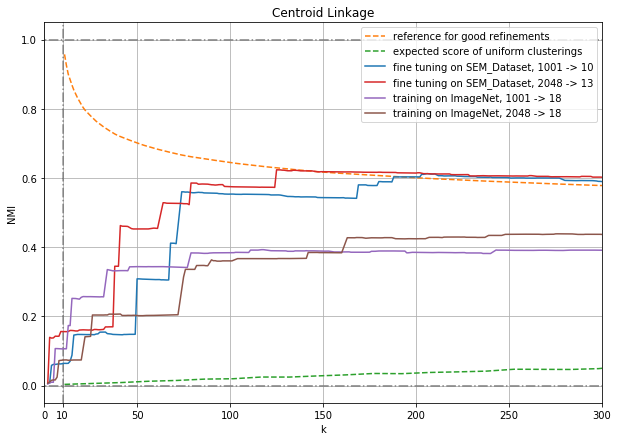

In [13]:
method_name = 'Centroid Linkage'

data = names[method_name]
# fig,axn = plt.subplots(2, 1, figsize=(14,14))
# plt.setp(axn, xticks=[], yticks=[])
# for i,(xmin,xmax) in enumerate([(-200,7900),(0,250)]):
#     fig.add_subplot(2,1,i+1)
fig = plt.figure(figsize=(10,7))
for i,(xmin,xmax) in enumerate([(0,300)]):
    plt.ylim(ymax=1.05, ymin=-0.05)
    plt.xlabel('k')
    plt.ylabel('NMI')
    plt.xlim(xmin=xmin, xmax=xmax)
    plt.xticks(np.hstack(([10],range(0,xmax+1,50))))
    plt.grid()

    plt.hlines(0,xmin=-100,xmax=x[-1]+100, colors='tab:gray', linestyle='-.')
    plt.hlines(1,xmin=-100,xmax=x[-1]+100, colors='tab:gray', linestyle='-.')
    plt.vlines(10,ymin=-0.1,ymax=1.1, colors='k', linestyle='-.', alpha=0.4)

    plt.plot(x,best, ls='--', color='tab:orange', label='reference for good refinements') 
    plt.plot(xnew,rnd_sm, ls='--', color='tab:green', label='expected score of uniform clusterings')
    
    colors = ['tab:blue', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']
    for j,k in enumerate(['1001b','2048b','1001i','2048i']): #enumerate(data.keys()):
        y = data[k]
        new_K_r = k_range[:len(y)]
        plt.plot(new_K_r[(y!=0)&(y<1)], y[(y!=0)&(y<1)],label=labels[k], color=colors[j])
    plt.legend(loc=0)
    plt.title(method_name)

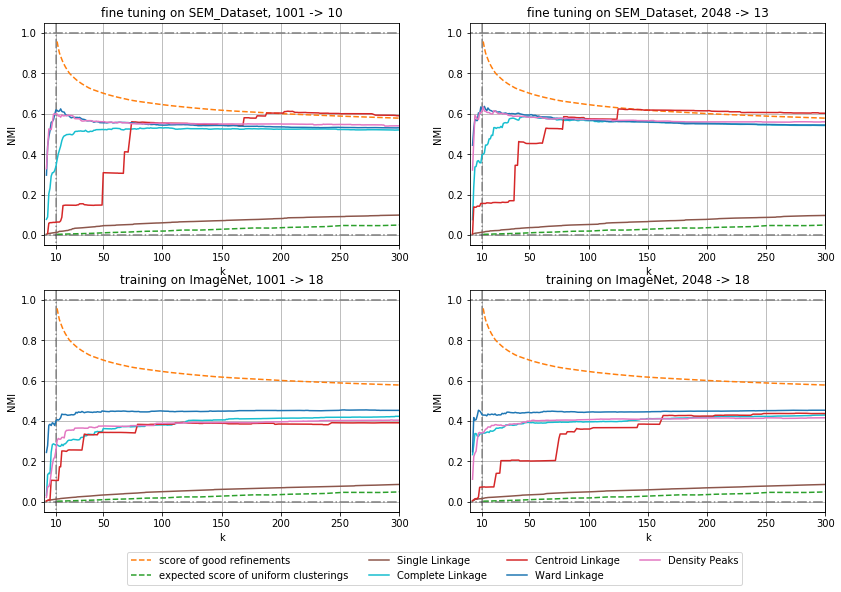

In [40]:
# distance_name = '1001b'
# 
# fig,axn = plt.subplots(2, 1, figsize=(14,14))
# plt.setp(axn, xticks=[], yticks=[])
# for i,(xmin,xmax) in enumerate([(-200,7900),(0,250)]):
#     fig.add_subplot(2,1,i+1)
# 
# fig = plt.figure(figsize=(10,7))
# for i,(xmin,xmax) in enumerate([(0,300)]):

fig,axn = plt.subplots(2, 2, figsize=(14,9))
plt.setp(axn, xticks=[], yticks=[])
xmin, xmax = 0, 300
for i, distance_name in enumerate(['1001b', '2048b', '1001i', '2048i']):
    fig.add_subplot(2,2,i+1)
    plt.ylim(ymax=1.05, ymin=-0.05)
    plt.xlabel('k')
    plt.ylabel('NMI')
    plt.xlim(xmin=xmin, xmax=xmax)
    plt.xticks(np.hstack(([10],range(50,xmax+1,50))))
    plt.grid()

    plt.hlines(0,xmin=-100,xmax=x[-1]+100, colors='tab:gray', linestyle='-.')
    plt.hlines(1,xmin=-100,xmax=x[-1]+100, colors='tab:gray', linestyle='-.')
    plt.vlines(10,ymin=-0.1,ymax=1.1, colors='k', linestyle='-.', alpha=0.4)

    plt.plot(x,best, ls='--', color='tab:orange', label='score of good refinements') 
    plt.plot(xnew,rnd_sm, ls='--', color='tab:green', label='expected score of uniform clusterings')
    
    colors = ['tab:brown', 'tab:cyan', 'tab:red', 'tab:blue', 'tab:pink', 'tab:olive', 'tab:purple']
    for j,method in enumerate(['Single Linkage', 'Complete Linkage',\
                               'Centroid Linkage', 'Ward Linkage', 'Density Peaks']): 
        y = names[method][distance_name]
        new_K_r = k_range[:len(y)]
        plt.plot(new_K_r[(y!=0)&(y<1)], y[(y!=0)&(y<1)],label=method, color=colors[j])
    plt.title(labels[distance_name])
plt.legend(loc='lower center', bbox_to_anchor =(-0.10,-0.35), ncol=4)

In [26]:
y = centr['1001b']
index = np.arange(len(y))
local_i = np.argmax(y[(y!=0)&(y<1)])
i_max = index[(y!=0)&(y<1)][local_i]
print(i_max, y[i_max])

204 0.6124860216706016
